# Software Design for Data Scientists

## *Sophisticated Data Manipulation

## 1. Python's Data Science Ecosystem

With this simple Python computation experience under our belt, we can now move to doing some more interesting analysis.

### Python's Data Science Ecosystem

In addition to Python's built-in modules like the ``math`` module we explored above, there are also many often-used third-party modules that are core tools for doing data science with Python.
Some of the most important ones are:

#### [``numpy``](http://numpy.org/): Numerical Python

Numpy is short for "Numerical Python", and contains tools for efficient manipulation of arrays of data.
If you have used other computational tools like MatLab, Numpy should feel very familiar.

#### [``scipy``](http://scipy.org/): Scientific Python

Scipy is short for "Scientific Python", and contains a wide range of functionality for accomplishing common scientific tasks, such as:

* optimization/minimization
* numerical integration
* interpolation
* and much more

We will not look closely at Scipy today, but we will use its functionality later in the course.

#### [``pandas``](http://pandas.pydata.org/): Labeled Data Manipulation in Python

Pandas is short for "Panel Data", and contains tools for doing more advanced manipulation of labeled data in Python, in particular with a columnar data structure called a *Data Frame*.
If you've used the [R](http://rstats.org) statistical language, much of the functionality in Pandas should feel very familiar.

#### [``matplotlib``](http://matplotlib.org): Visualization in Python

Matplotlib started out as a Matlab plotting clone in Python, and has grown from there in the 15 years since its creation. It is the most popular data visualization tool currently in the Python data world (though other recent packages are starting to encroach on its monopoly).

# 2. Installation

### Installing Pandas & friends

Because the above packages are not included in Python itself, you need to install them separately. While it is possible to install these from source (compiling the C and/or Fortran code that does the heavy lifting under the hood) it is much easier to use a package manager like ``conda``. All it takes is to run

```
$ conda install numpy scipy pandas matplotlib
```

and (so long as your conda setup is working) the packages will be downloaded and installed on your system.

# 3. Arrays and slicing in Numpy

In [1]:
import numpy as np

### Lists in native Python

Let's create a **list**, a native Python object that we've used earlier today.

In [2]:
my_list = [2, 5, 7, 8]
my_list

[2, 5, 7, 8]

In [3]:
type(my_list)

list

This list is one-dimensional, let's make it multidimensional!

In [4]:
multi_list = [[1, 2, 3], [4, 5, 6]]

How do we access the *6* element in the second row, third column for native Python list?

In [5]:
multi_list[1][2]

6

### Converting to numpy Arrays

In [6]:
my_array = np.array(my_list)

In [7]:
type(my_array)

numpy.ndarray

In [8]:
my_array.dtype

dtype('int64')

In [9]:
my_array.shape

(4,)

In [10]:
my_array = np.array([my_list])

In [11]:
my_array.shape

(1, 4)

In [12]:
my_array

array([[2, 5, 7, 8]])

In [13]:
multi_array = np.array([[1, 2, 3], [4, 5, 6]], np.int32)

How do we access the *6* element in the second row, third column for numpy array?

In [14]:
multi_array[1][2]

6

How do we retrieve a slice of the array, `array([[1, 2], [4, 5]])`?

In [15]:
multi_array[0:2, 0:2]

array([[1, 2],
       [4, 5]], dtype=int32)

How do we retrieve the second column of the array?

In [16]:
multi_array[:, 1]

array([2, 5], dtype=int32)

## 4. Introduction to Pandas DataFrames

What are the elements of a table?

In [17]:
# Pandas DataFrames as table elements
import pandas as pd

What operations do we perform on tables?

In [18]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [2, 4, 6], 'ccc': [1.0, 33, 4]})
df.index = ['x', 'y', 'z']
df

,A,B,ccc
x,1,2,1.0
y,2,4,33.0
z,3,6,4.0


Adding to tables together:

In [19]:
df+df

,A,B,ccc
x,2,4,2.0
y,4,8,66.0
z,6,12,8.0


In [20]:
df2 = pd.DataFrame({'A': [1, 3, 2], 'B': [2, 6, 4]})
df2.index = ['x', 'z', 'y']
df2

,A,B
x,1,2
z,3,6
y,2,4


If you try to add two data frames that don't have quite the same columns:

In [21]:
df+df2

,A,B,ccc
x,2,4,NaN
y,4,8,NaN
z,6,12,NaN


We can get a subset of columns by indexing into the data frame with a set of column names:

In [22]:
sub_df = df[['A', 'ccc']]
sub_df

,A,ccc
x,1,1.0
y,2,33.0
z,3,4.0


You can also combine these operations together:

In [23]:
df['A'] + 2*df['B']

x     5
y    10
z    15
dtype: int64

# Operations on a Pandas DataFrame

## 5. Manipulating Data with DataFrames

### Downloading the data

Shell commands can be run from the notebook by preceding them with an exclamation point:

In [24]:
!ls

data_manipulation.ipynb                jupyter_and_python_breakout_key.ipynb
data_manipulation_key.ipynb            pronto.csv
jupyter.md                             python_vars_and_flow_control.ipynb
jupyter_and_python_breakout.ipynb      python_vars_and_flow_control_key.ipynb


uncomment this to download the data:

In [25]:
#!curl -o pronto.csv 'https://data.seattle.gov/api/views/tw7j-dfaw/rows.csv?accessType=DOWNLOAD'

### Loading Data into a DataFrame

Because we'll use it so much, we often import under a shortened name using the ``import ... as ...`` pattern:

In [26]:
import pandas as pd

Now we can use the ``read_csv`` command to read the comma-separated-value data:

In [27]:
df = pd.read_csv('pronto.csv')

*Note: strings in Python can be defined either with double quotes or single quotes*

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
len(df)

275091

In [30]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


### Viewing Pandas Dataframes

The ``head()`` and ``tail()`` methods show us the first and last rows of the data

In [31]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [32]:
df.columns.tolist()

['trip_id',
 'starttime',
 'stoptime',
 'bikeid',
 'tripduration',
 'from_station_name',
 'to_station_name',
 'from_station_id',
 'to_station_id',
 'usertype',
 'gender',
 'birthyear']

In [33]:
df.index

RangeIndex(start=0, stop=275091, step=1)

In [34]:
smaller_df = df.loc[[1,4,6,7,9,34],:]


In [35]:
smaller_df.index

Int64Index([1, 4, 6, 7, 9, 34], dtype='int64')

The ``shape`` attribute shows us the number of elements:

In [36]:
df.shape

(275091, 12)

The ``columns`` attribute gives us the column names

In [37]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

The ``index`` attribute gives us the index names

In [38]:
df.index

RangeIndex(start=0, stop=275091, step=1)

The ``dtypes`` attribute gives the data types of each column:

In [39]:
df.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

### Sophisticated Data Manipulation

Here we'll cover some key features of manipulating data with pandas

Access columns by name using square-bracket indexing:

In [40]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [41]:
df_small = df['stoptime']

In [42]:
type(df_small)

pandas.core.series.Series

In [43]:
df_small.head()

0    10/13/2014 10:48:00 AM
1    10/13/2014 10:48:00 AM
2    10/13/2014 10:48:00 AM
3    10/13/2014 10:48:00 AM
4    10/13/2014 10:49:00 AM
Name: stoptime, dtype: object

In [44]:
type(df_small)

pandas.core.series.Series

In [45]:
df_small.tolist()

['10/13/2014 10:48:00 AM',
 '10/13/2014 10:48:00 AM',
 '10/13/2014 10:48:00 AM',
 '10/13/2014 10:48:00 AM',
 '10/13/2014 10:49:00 AM',
 '10/13/2014 10:47:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:49:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:49:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:52:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:55:00 AM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 12:02:00 PM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 11:51:00 AM',
 

Mathematical operations on columns happen *element-wise*:

In [46]:
trip_duration_hours = df['tripduration']/3600
trip_duration_hours[:2]

0    0.273871
1    0.257326
Name: tripduration, dtype: float64

In [47]:
trip_duration_hours.head()

0    0.273871
1    0.257326
2    0.245509
3    0.240538
4    0.256645
Name: tripduration, dtype: float64

In [48]:
df['trip_duration_hours'] = df['tripduration']/3600

In [49]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,trip_duration_hours
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,0.273871
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,0.257326
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,0.245509
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,0.240538
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,0.256645


In [50]:
del df['trip_duration_hours']

In [51]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [52]:
df.loc[[0,4],['starttime', 'stoptime']]

,starttime,stoptime
0,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM
4,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM


In [53]:
df_long_trips = df[df['tripduration'] > 10000]

In [54]:
sel = df['tripduration'] > 10000
df_long_trips = df[sel]

In [55]:
df_long_trips

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
68,506,10/13/2014 12:08:00 PM,10/13/2014 07:07:00 PM,SEA00155,25119.114,2nd Ave & Spring St,2nd Ave & Vine St,CBD-06,BT-03,Member,Male,1988.0
193,649,10/13/2014 02:54:00 PM,10/13/2014 05:59:00 PM,SEA00193,11144.159,NE 42nd St & University Way NE,NE 42nd St & University Way NE,UD-02,UD-02,Short-Term Pass Holder,NaN,NaN
408,908,10/13/2014 11:12:00 PM,10/14/2014 06:52:00 AM,SEA00230,27583.945,7th Ave & Union St,2nd Ave & Pine St,CBD-03,CBD-13,Short-Term Pass Holder,NaN,NaN
475,983,10/14/2014 09:12:00 AM,10/14/2014 01:20:00 PM,SEA00181,14885.176,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,NaN,NaN
512,1025,10/14/2014 10:49:00 AM,10/14/2014 05:19:00 PM,SEA00244,23346.911,E Pine St & 16th Ave,PATH / 9th Ave & Westlake Ave,CH-07,SLU-07,Member,Male,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...
274051,294382,03/25/2017 02:28:00 PM,03/25/2017 07:05:00 PM,SEA00494,16634.168,Cal Anderson Park / 11th Ave & Pine St,Pier 69 / Alaskan Way & Clay St,CH-08,WF-01,Short-Term Pass Holder,NaN,NaN
274052,294383,03/25/2017 02:28:00 PM,03/25/2017 07:05:00 PM,SEA00182,16639.182,Cal Anderson Park / 11th Ave & Pine St,Pier 69 / Alaskan Way & Clay St,CH-08,WF-01,Short-Term Pass Holder,NaN,NaN
274266,294604,03/27/2017 11:56:00 AM,03/27/2017 03:29:00 PM,SEA00291,12758.624,6th Ave S & S King St,NE 42nd St & University Way NE,ID-04,UD-02,Short-Term Pass Holder,NaN,NaN
275086,295463,03/31/2017 11:16:00 PM,04/01/2017 02:11:00 AM,SEA00347,10487.475,NE 42nd St & University Way NE,E Harrison St & Broadway Ave E,UD-02,CH-02,Short-Term Pass Holder,NaN,NaN


In [56]:
df[sel].shape

(3243, 12)

In [57]:
# Make a copy of a slice
df_subset = df[['starttime', 'stoptime']].copy()
df_subset['trip_hours'] = df['tripduration']/3600

Columns can be created (or overwritten) with the assignment operator.
Let's create a *tripminutes* column with the number of minutes for each trip

In [58]:
df['tripminutes'] = df['tripduration']/60

More complicated mathematical operations can be done with tools in the ``numpy`` package:

### Working with Times

One trick to know when working with columns of times is that Pandas ``DateTimeIndex`` provides a nice interface for working with columns of times.

For a dataset of this size, using ``pd.to_datetime`` and specifying the date format can make things much faster (from the [strftime reference](http://strftime.org/), we see that the pronto data has format ``"%m/%d/%Y %I:%M:%S %p"``

(Note: you can also use ``infer_datetime_format=True`` in most cases to automatically infer the correct format, though due to a bug it doesn't work when AM/PM are present)

With it, we can extract, the hour of the day, the day of the week, the month, and a wide range of other views of the time:

In [59]:
datetime_series = pd.to_datetime(df['starttime'])
df['hour'] = datetime_series.dt.hour
df['dayofweek'] = datetime_series.dt.weekday
df['month'] = datetime_series.dt.month

### Simple Grouping of Data

The real power of Pandas comes in its tools for grouping and aggregating data. Here we'll look at *value counts* and the basics of *group-by* operations.

#### Value Counts

Pandas includes an array of useful functionality for manipulating and analyzing tabular data.
We'll take a look at two of these here.

The ``pandas.value_counts`` returns statistics on the unique values within each column.

We can use it, for example, to break down rides by gender:

In [60]:
pd.value_counts(df["gender"])

Male      135171
Female     34997
Other       3647
Name: gender, dtype: int64

Or to break down rides by age:

In [61]:
pd.value_counts(2023 - df["birthyear"])

36.0    15381
38.0    10491
42.0     9028
41.0     8950
39.0     8699
        ...  
87.0        7
24.0        6
81.0        2
79.0        1
92.0        1
Name: birthyear, Length: 61, dtype: int64

By default, the values rather than the index are sorted. Use ``sort=False`` to turn this behavior off:

In [62]:
pd.value_counts(df["birthyear"], sort=False)

1960.0    1118
1970.0    2741
1988.0    8228
1977.0    4187
1971.0    3471
          ... 
1944.0       1
1999.0       6
1939.0      47
1997.0     285
1931.0       1
Name: birthyear, Length: 61, dtype: int64

We can explore other things as well: day of week, hour of day, etc.

In [63]:
pd.value_counts(df["hour"])

17    28245
8     23646
16    22722
9     20407
18    19584
15    18674
12    17357
13    17333
14    16826
11    16348
10    15422
19    12925
7     12625
20     8582
21     6812
22     4492
6      3625
23     2949
0      1725
5      1598
1      1126
2       844
4       775
3       449
Name: hour, dtype: int64

### Group-by Operation

One of the killer features of the Pandas dataframe is the ability to do group-by operations.
You can visualize the group-by like this (image borrowed from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do))

In [64]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,tripminutes,hour,dayofweek,month
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,16.432250,10,0,10
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,15.439583,10,0,10
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,14.730517,10,0,10
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,14.432283,10,0,10
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,15.398717,10,0,10


In [65]:
df_sub = df[['from_station_id', 'trip_id']]
df_count = df_sub.groupby(['from_station_id']).count()
df_count.head()
df_count.columns = ['count']
df_count.head()

,count
from_station_id,
BT-01,10463
BT-03,7334
BT-04,4666
BT-05,5699
BT-06,150


In [66]:
df_mean = df.groupby(['from_station_id']).mean()
df_mean.head()

,trip_id,tripduration,birthyear,tripminutes,hour,dayofweek,month
from_station_id,,,,,,,
BT-01,147831.009844,1375.031203,1980.131427,22.917187,13.815636,3.131033,6.541623
BT-03,139404.294655,1019.200684,1976.505142,16.986678,12.970684,2.899236,6.563403
BT-04,157992.809687,891.095897,1979.877044,14.851598,13.825332,2.598800,6.919846
BT-05,139283.572381,1199.949481,1975.937479,19.999158,13.780312,2.955606,6.567117
BT-06,291807.953333,659.770547,1975.830769,10.996176,13.466667,2.640000,2.580000


In [67]:
dfgroup = df.groupby(['from_station_id'])
dfgroup.groups

{'BT-01': [217, 227, 228, 282, 283, 310, 326, 327, 329, 331, 443, 470, 471, 525, 526, 569, 657, 659, 661, 703, 752, 801, 802, 861, 998, 1069, 1154, 1172, 1411, 1412, 1418, 1423, 1427, 1477, 1482, 1521, 1522, 1528, 1543, 1544, 1614, 1802, 1803, 1804, 1866, 1868, 1869, 1898, 2021, 2023, 2025, 2027, 2028, 2058, 2137, 2138, 2175, 2176, 2228, 2229, 2335, 2425, 2622, 2624, 2647, 2649, 2741, 2771, 2855, 2856, 2893, 2945, 3028, 3053, 3097, 3254, 3264, 3615, 3644, 3674, 3765, 3789, 3863, 3913, 3971, 3984, 3993, 3997, 4007, 4020, 4152, 4193, 4384, 4601, 4724, 4780, 4819, 4933, 4934, 5019, ...], 'BT-03': [87, 88, 230, 261, 366, 407, 414, 439, 453, 754, 761, 810, 824, 909, 926, 1036, 1042, 1100, 1104, 1133, 1180, 1184, 1215, 1240, 1241, 1267, 1287, 1302, 1331, 1333, 1496, 1567, 1568, 1616, 1653, 1694, 1885, 1935, 2002, 2042, 2073, 2112, 2113, 2134, 2178, 2179, 2314, 2315, 2330, 2331, 2332, 2333, 2334, 2344, 2385, 2401, 2487, 2519, 2558, 2559, 2578, 2635, 2637, 2641, 2655, 2663, 2664, 2685, 2732, 2

The simplest version of a groupby looks like this, and you can use almost any aggregation function you wish (mean, median, sum, minimum, maximum, standard deviation, count, etc.)

```
<data object>.groupby(<grouping values>).<aggregate>()
```

for example, we can group by gender and find the average of all numerical columns:

In [68]:
df.groupby('gender').mean()

,trip_id,tripduration,birthyear,tripminutes,hour,dayofweek,month
gender,,,,,,,
Female,145929.823499,697.919834,1978.425056,11.631997,12.996714,2.552590,6.459125
Male,151446.703864,558.367672,1980.282169,9.306128,13.020130,2.457021,6.634441
Other,169321.573348,605.837092,1980.524267,10.097285,13.092679,2.994242,6.410200


It's also possible to index the grouped object like it is a dataframe. If I want to get only the mean birth year:

In [69]:
df.groupby('gender')['birthyear'].mean()

gender
Female    1978.425056
Male      1980.282169
Other     1980.524267
Name: birthyear, dtype: float64

You can even group by multiple values: for example we can look at the trip duration by time of day and by gender:

In [70]:
df.groupby(['gender', 'hour'])['tripduration'].mean()

gender  hour
Female  0       591.380268
        1       508.777745
        2       505.069778
        3       433.498914
        4       505.461497
                   ...    
Other   19      598.535293
        20      561.447222
        21      434.131885
        22      371.930192
        23      414.811000
Name: tripduration, Length: 71, dtype: float64

The ``unstack()`` operation can help make sense of this type of multiply-grouped data. What this technically does is split a multiple-valued index into an index plus columns:

In [71]:
df.groupby(['gender', 'hour'])['tripduration'].mean().unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
gender,,,,,,,,,,,,,,,,,,,,,
Female,591.380268,508.777745,505.069778,433.498914,505.461497,641.527839,585.726293,690.646182,671.049313,646.975130,...,749.648905,731.386837,697.467570,731.873398,721.145525,685.122995,682.246636,633.353413,622.817029,792.45717
Male,515.973157,528.691678,549.521105,424.284302,682.295862,511.311059,471.078660,551.195541,537.497385,528.169844,...,578.272156,629.199118,628.657338,606.122740,564.156230,529.134865,541.830652,505.574607,505.376361,495.36007
Other,492.829091,825.941000,440.641333,338.601000,168.646000,NaN,559.517545,485.616496,587.118751,646.489332,...,685.278839,718.103179,693.682153,568.167570,545.438397,598.535293,561.447222,434.131885,371.930192,414.81100


### Visualizing data with ``pandas``

Of course, looking at tables of data is not very intuitive.
Fortunately Pandas has many useful plotting functions built-in, all of which make use of the ``matplotlib`` library to generate plots.

In the past, whenever you did plotting in the IPython notebook, you should have first run this *magic command* which configured the notebook to work well with plots. However, this is *no longer necessary* as of the last few years. If you have an *old* installation of iPython, you may need to do this - but you should have upgraded as part of the Software Installation instructions.

In [72]:
%matplotlib inline

Now we can simply call the `plot()` method of any series or dataframe to get a reasonable view of the data:

<AxesSubplot:>

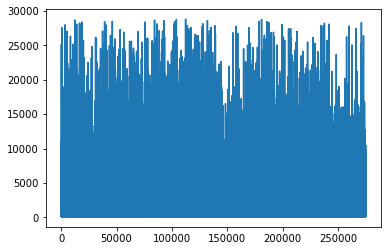

In [73]:
import matplotlib.pyplot as plt
df['tripduration'].plot()

### Adjusting the Plot Style

Matplotlib has a number of plot styles you can use. For example, if you like R you might use the ggplot style:

In [74]:
plt.style.use("ggplot")

### Other plot types

Pandas supports a range of other plotting types; you can find these by using the <TAB> autocomplete on the ``plot`` method:

In [75]:
# plt.

For example, we can create a histogram of trip durations:

<AxesSubplot:>

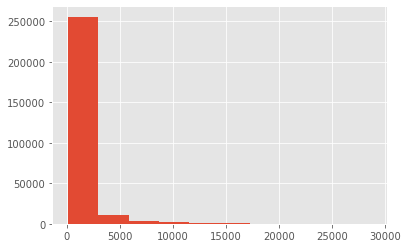

In [76]:
df['tripduration'].hist()

If you'd like to adjust the x and y limits of the plot, you can use the ``set_xlim()`` and ``set_ylim()`` method of the resulting object:

(0.0, 20000.0)

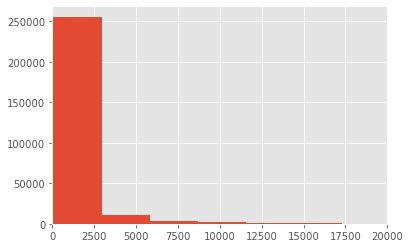

In [77]:
df['tripduration'].hist().set_xlim(0, 20000)

## Breakout: Exploring the Data

Make a plot of the total number of rides as a function of month of the year (You'll need to extract the month, use a ``groupby``, and find the appropriate aggregation to count the number in each group).

<AxesSubplot:xlabel='month'>

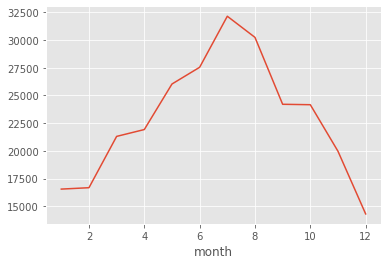

In [78]:
df.groupby('month')['month'].count().plot()

Split this plot by gender. Do you see any seasonal ridership patterns by gender?

<AxesSubplot:xlabel='month'>

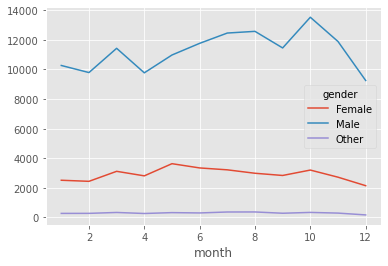

In [79]:
df.groupby(['month', 'gender'])['month'].count().unstack().plot()

Split this plot by user type. Do you see any seasonal ridership patterns by usertype?

<AxesSubplot:xlabel='month'>

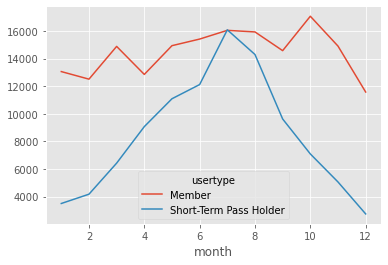

In [80]:
df.groupby(['month', 'usertype'])['month'].count().unstack().plot()

Repeat the above three steps, counting the number of rides by time of day rather that by month.

<AxesSubplot:xlabel='hour'>

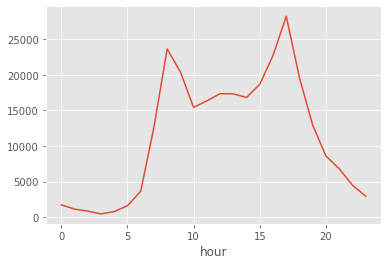

In [81]:
df.groupby('hour')['hour'].count().plot()

<AxesSubplot:xlabel='hour'>

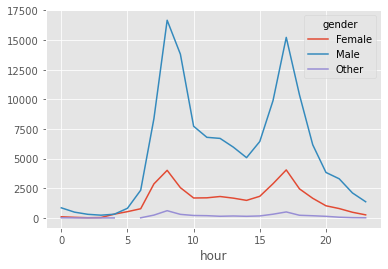

In [82]:
df.groupby(['hour', 'gender'])['month'].count().unstack().plot()

<AxesSubplot:xlabel='hour'>

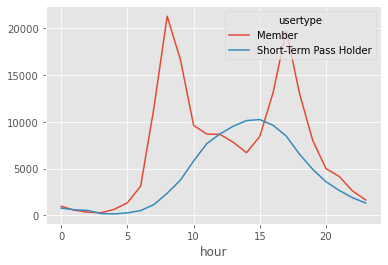

In [83]:
df.groupby(['hour', 'usertype'])['month'].count().unstack().plot()

Are there any other interesting insights you can discover in the data using these tools?